# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Para que en el notebook se muestren los gráficos sin tener que escribir más código
%matplotlib inline  

# 1. Importar el dataset

Vamos a usar el data set *Wine Quality Data Set* disponible y explicado [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). Solo vamos a hacer el análisis con el set de datos sobre el vino blanco. Lo descargamos y utilizamos.

In [6]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2018-09-28 18:52:41--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.249]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 264426 (258K) [text/csv]
Grabando a: “winequality-white.csv.1”

winequality-white.c 100%[===================>] 258,23K   150KB/s    in 1,7s    

2018-09-28 18:52:44 (150 KB/s) - “winequality-white.csv.1” guardado [264426/264426]



Los datos originales están separados por `;`

In [7]:
df = pd.read_csv('winequality-white.csv',sep=';')

# 2. Get a feel of the data

In [9]:
df.head() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [3]:
df.shape

(4898, 12)

El dataset tiene 4898 observaciones y 12 caracterísiticas. La variablee `quality` es la variable dependiente y las otas son caracterísiticas físico-químicas. 

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Key Insight**

Según lo que vemos en la tabla hay outliers.

#Key Observations - 
- Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
- Natably large differnece in 75th %tile and max values of predictors "residual sugar","free sulfur dioxide","total sulfur dioxide"
- Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset

# 3. Reconocer dificultades del dataset

## Datos faltantes

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


El set de datos no tiene datos faltantes y solo tenemos variable del tipo `float` e `integer`. También lo podemos ver con una visualización.

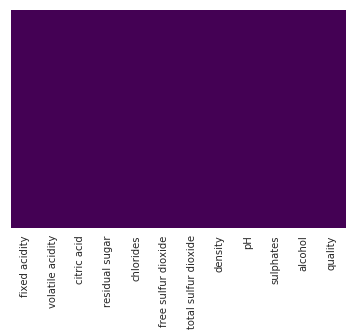

In [53]:
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap='viridis')

Cada cuadrado que no tiene morado es un dato faltante. En este caso no hay datos faltantes, así que todo se verá morado.

## Detectar outliers
Usando boxplots podemos ver rápidamente los outliers.

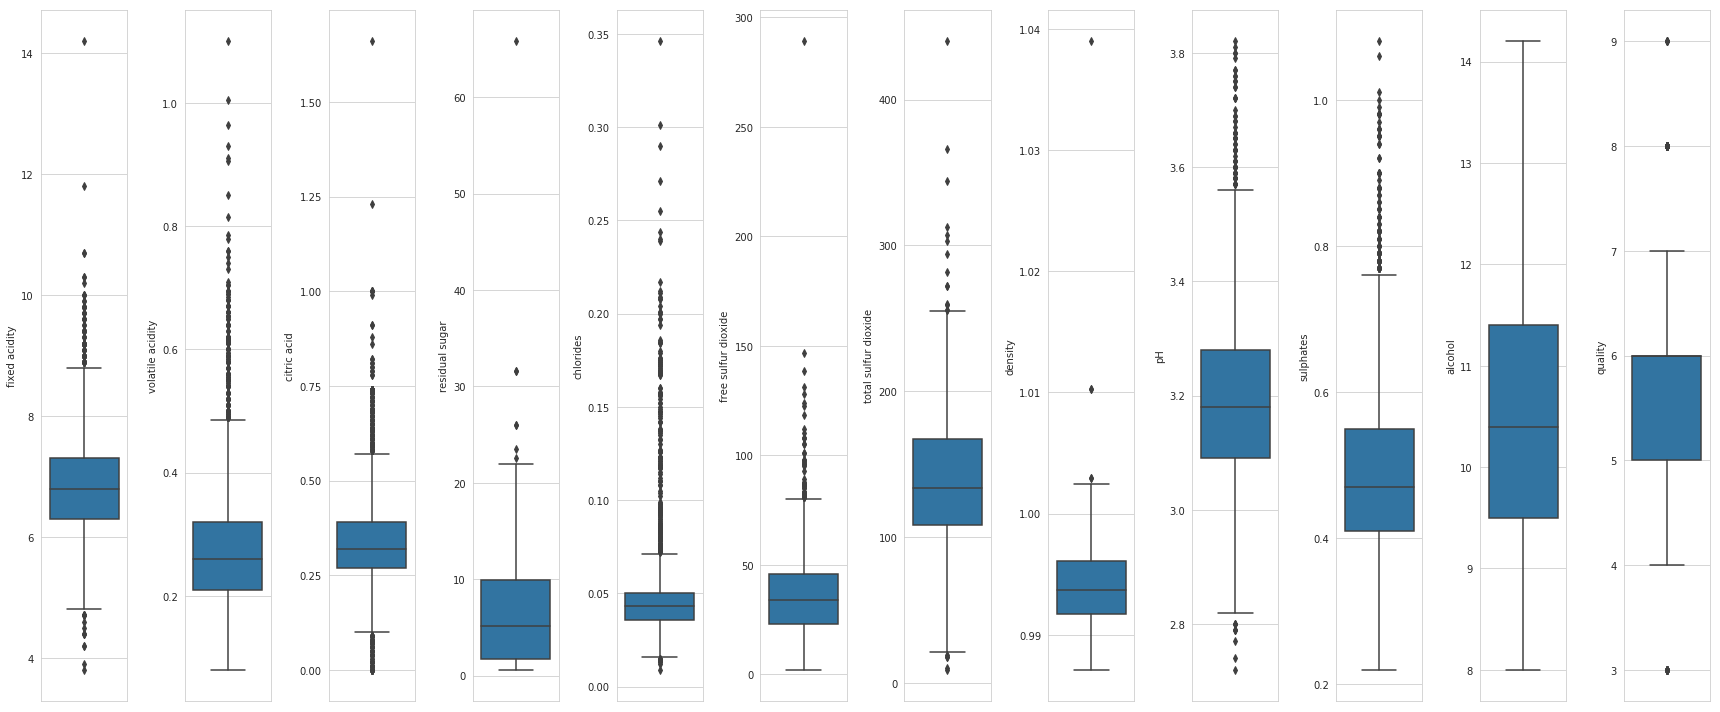

In [42]:
number_of_columns = len(df.columns)
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.boxplot(df[column], orient='v', ax=ax[i])
plt.tight_layout()

**Key Insights**

Claramente hay varias variables que tienen outliers. Estos tendrán que ser identificados y eliminados antes de crear modelos.

### Distribuciones
Usando violinplots podemos ver las verdaderas distribuciones de los datos.

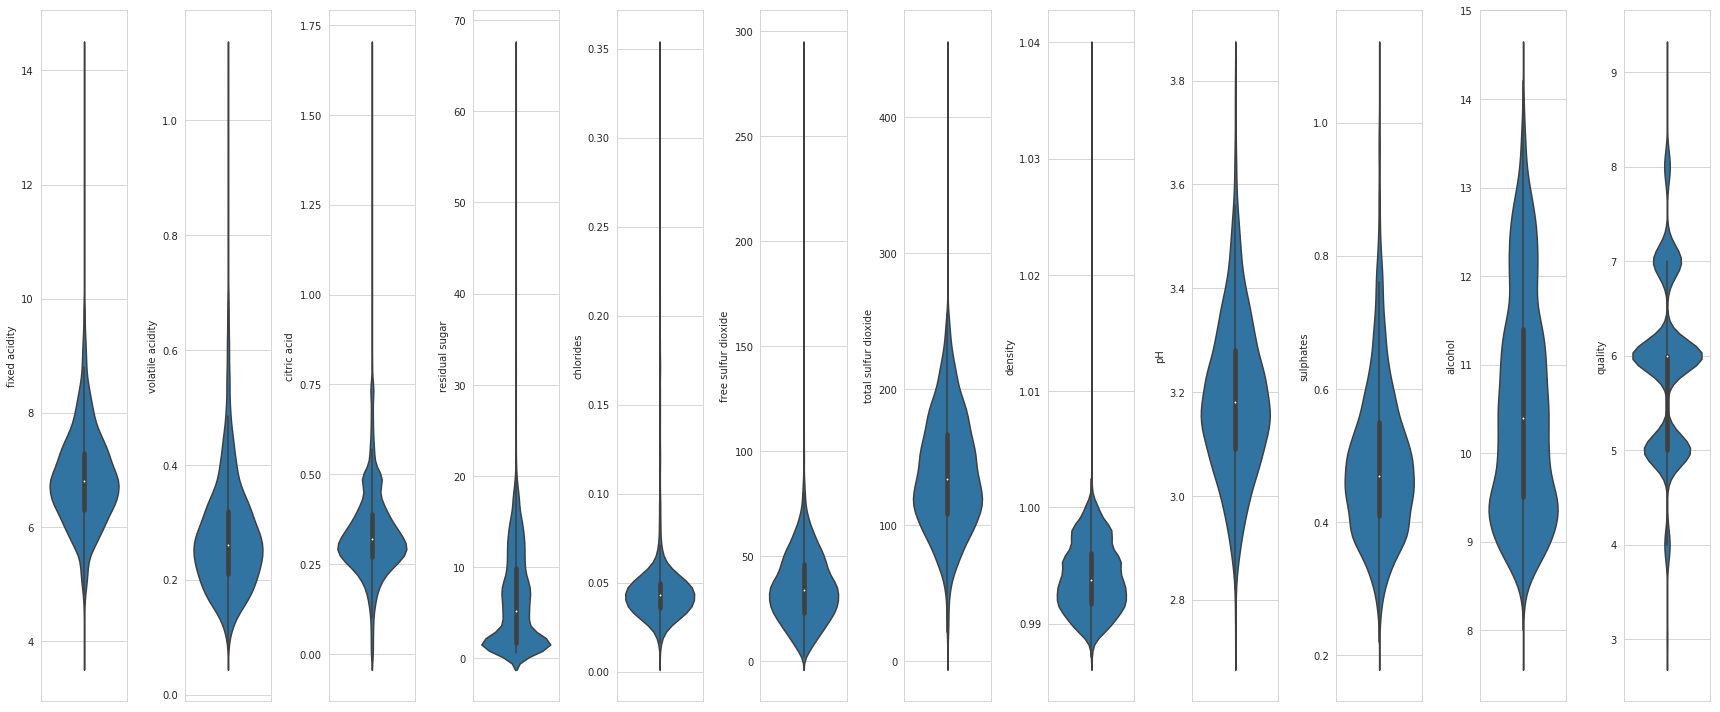

In [46]:
number_of_columns = len(df.columns)
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.violinplot(df[column], orient='v', ax=ax[i])
plt.tight_layout()

Este tipo de gráficos nos puede ayudar a entender mejor cómo son los datos.

**Key Insights**

En el caso de `quality`, se ven claramente 3 peaks de de valores que en el boxplot no podíamos ver. En el caso de `residual sugar` vemos que el valor más frecuente no es el valor de la media, algo que tampoco podíamos ver con el boxplot o la tabla.

# 4. Ver más en profundidad el dataset

## Entender la variable dependiente

In [62]:
df.quality.unique() 

array([6, 5, 7, 8, 4, 3, 9])

- La variable quality es discreta y categórica/ordenada.
- `quality` es un puntaje de 1 a 10, donde 1 es la peor calidad y 10 es la mejor calidad
- Los rankings 1, 2 y 10 no son usados en este dataset.

In [63]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

Para obtener la cantidad de cada uno de los puntajes podemos usar la función `value_counts` que nos entrega de mayor a menor cantidad, la cantidad de veces que se usa un valor. 

**Key Insights**

Con esto podemos ver que los puntajes se concentran en 5, 6 y 7. Hay muy pocos 9 y 3 en el dataset.

## Análisis Bi y Multivariado
Veamos la correlación entre las distintas variables. 

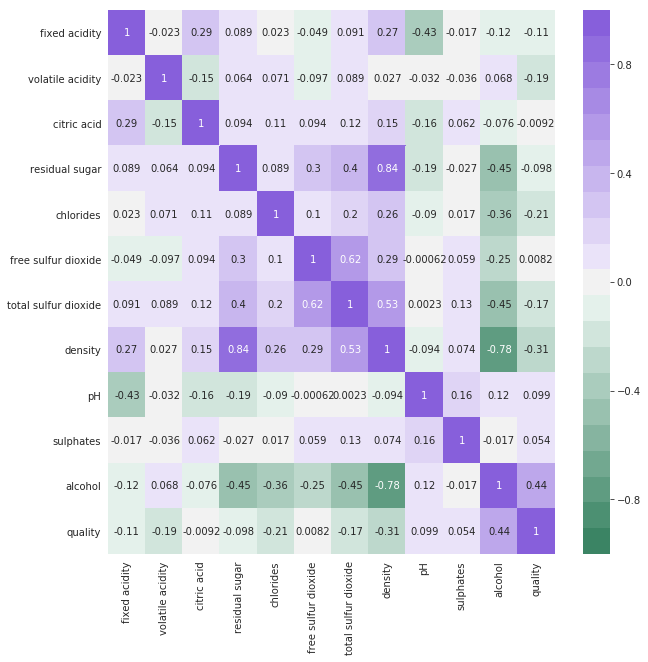

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(150, 275, n=21), annot=True, vmin=-1, vmax=1) 

- Morado significa correlación positiva y verde correlación negativa. Si el color es más intenso, más marcada es la correlación
- `annot=True` nos permite ver el valor de la correlación. 

**Key Insights**
- Podemos inferir que `density` tiene una correlación positiva con `residual sugar` y una fuerte correlación negativa con `alcohol`. Esto tiene sentido físico-químico: el azúcar y el agua se transforma en alcohol y dióxido de carbono. El alcohol es menos denso que el agua y el azúcar aumenta la densidad. Más info [aquí](https://en.wikipedia.org/wiki/Ethanol_fermentation)
- `free sulphur dioxide` y `citric acid` casi no tienen correlación con la calidad `quality`


## Cómo es la distribución de las variables?

Ya vimos algo de esto con los violin plots, pero estos gráficos son más conocidos y los pueden ayudar mejor a entender.

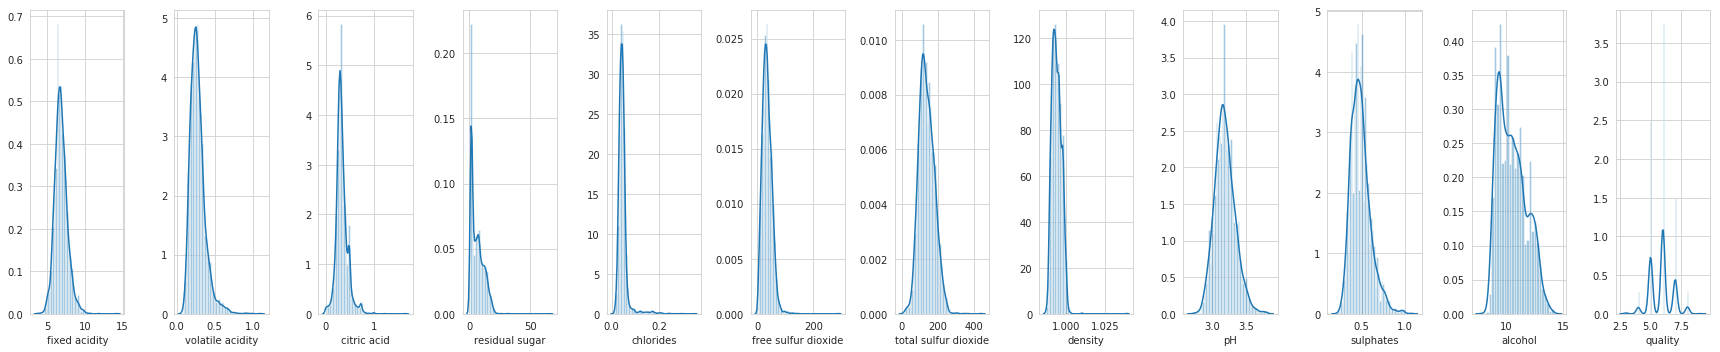

In [67]:
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns * 2, 5))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.distplot(df[column], ax=ax[i])
plt.tight_layout()

**Key insights**
- La columna `pH` tiene una distribución normal.
- Todas las otras variables están distruidas asimétricas positivas o negativas.

# 5. Identificar variables interesantes

En este caso son pocas columnas así que podemos hacer gráficos como el siguiente para poder ver pares de variables que pueden ser interesantes.

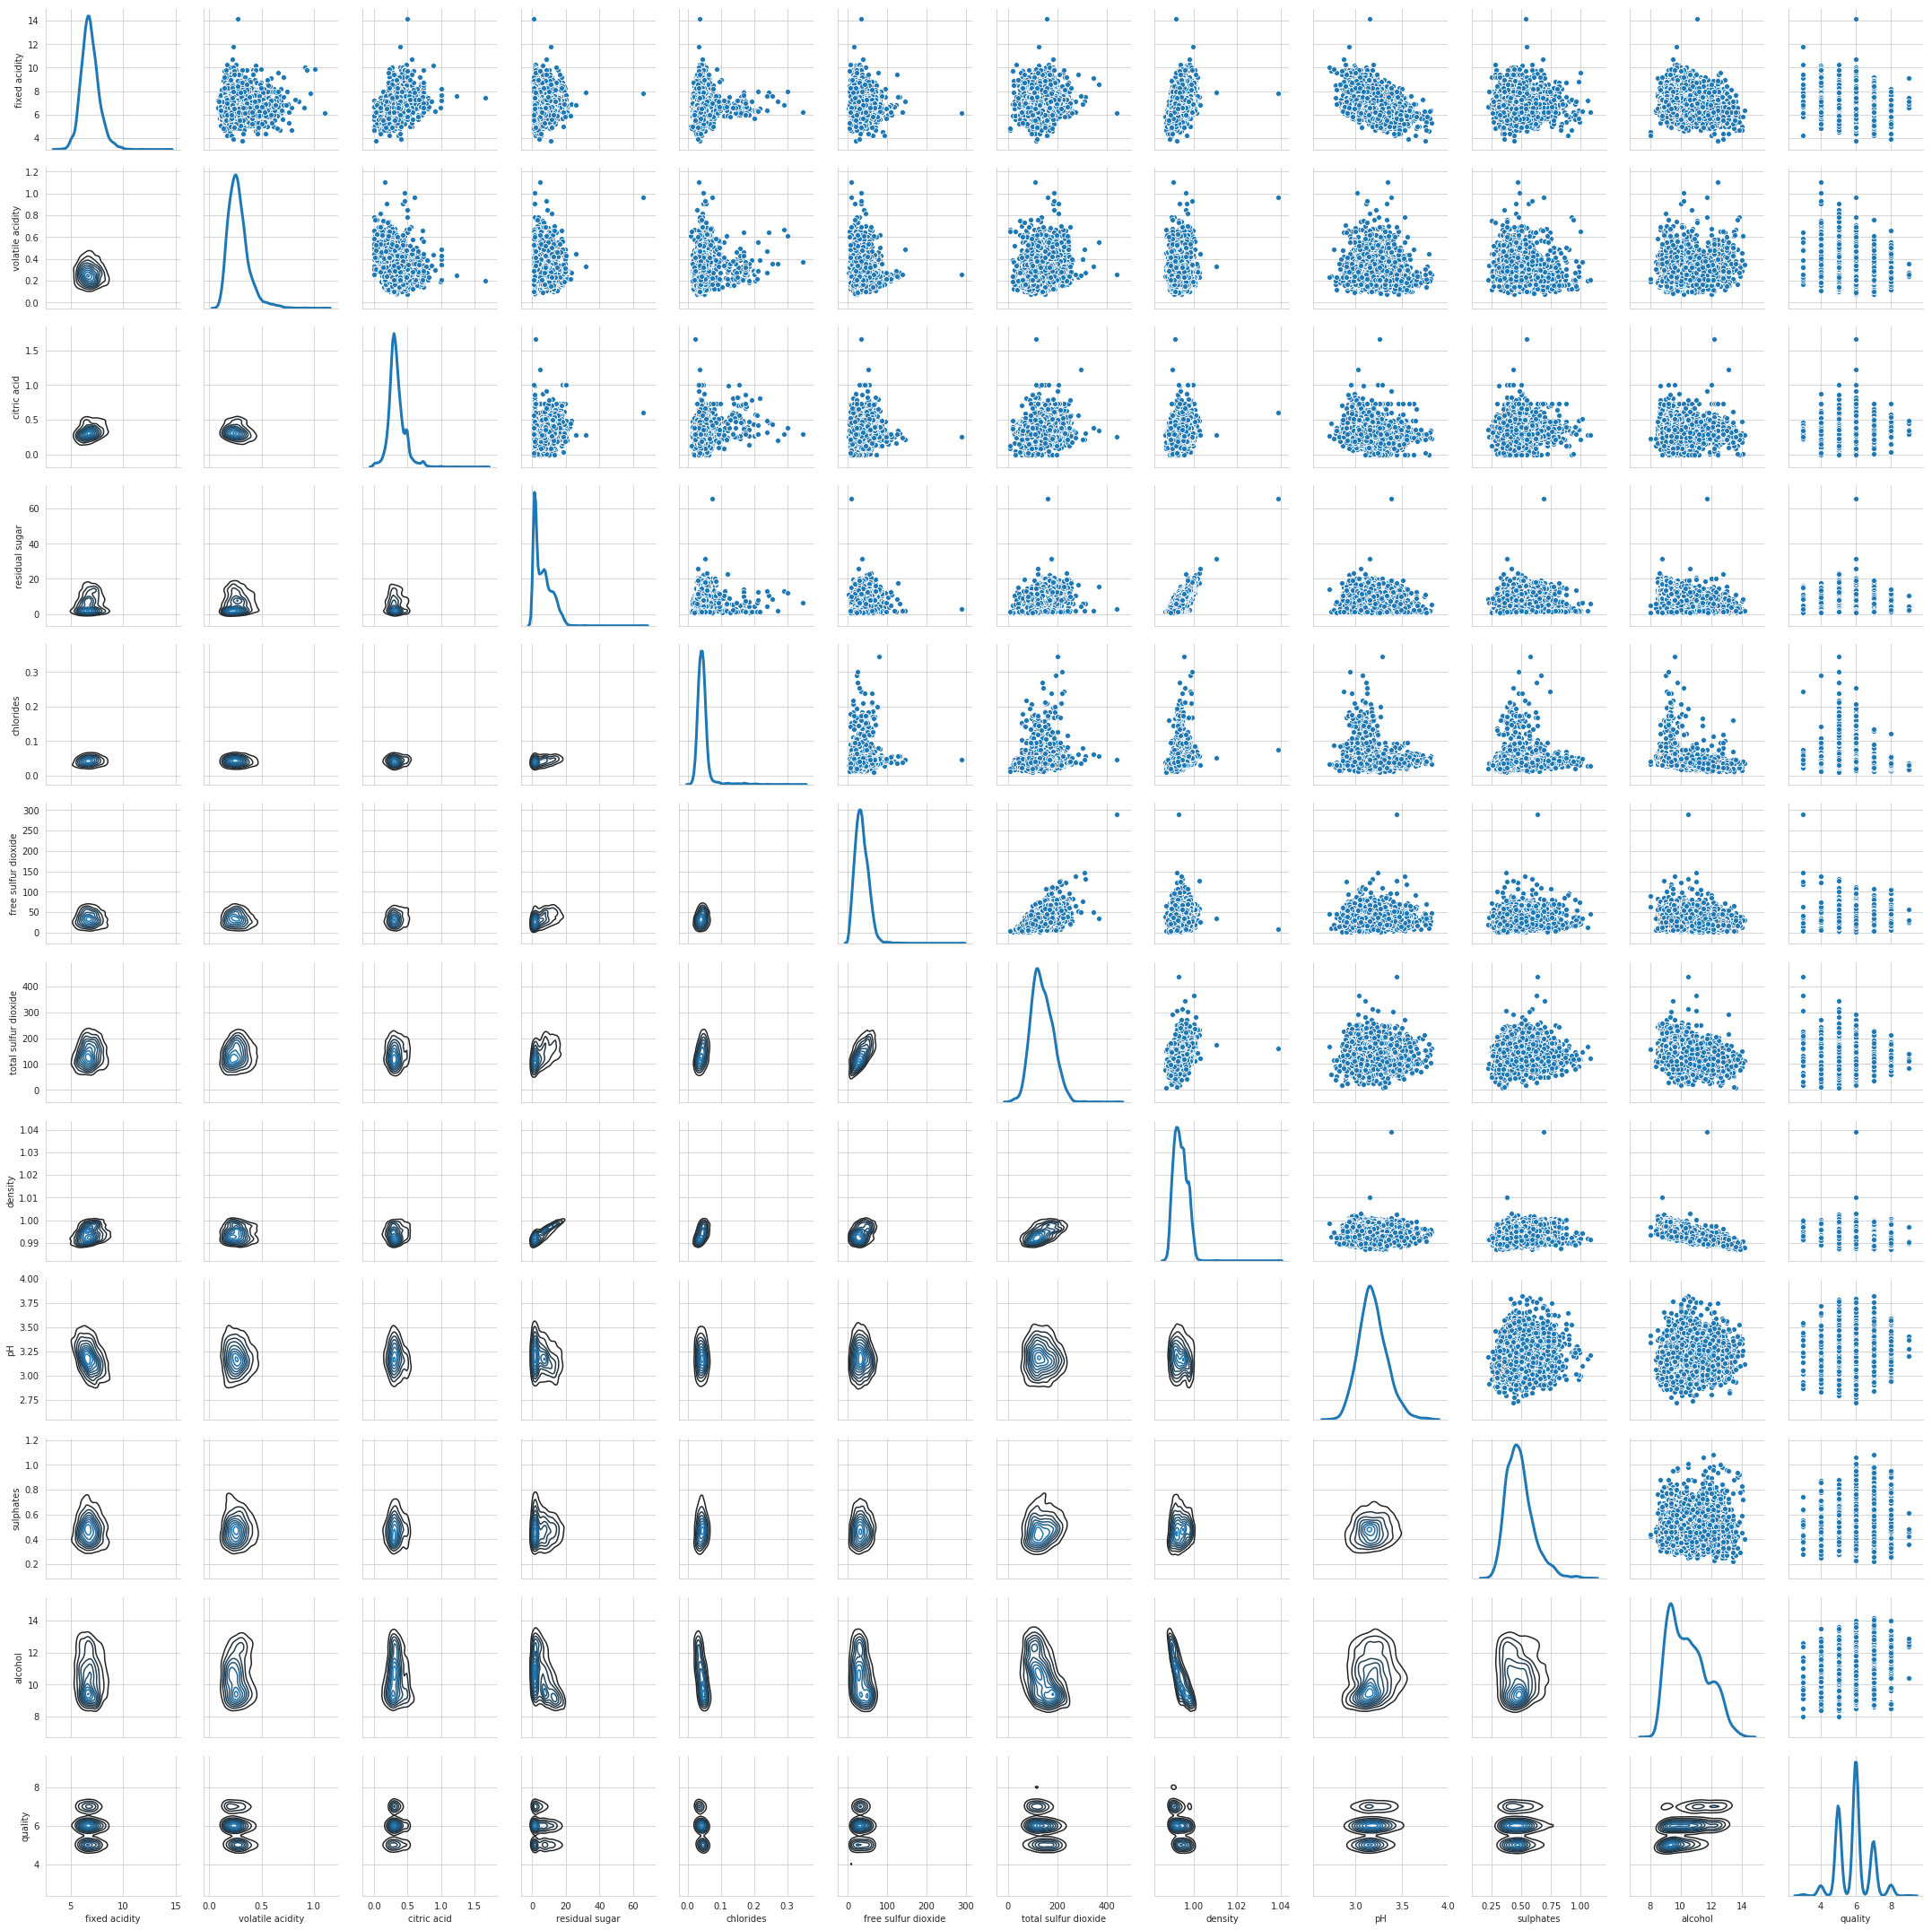

In [78]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

**¿Qué pasa si eliminamos los outliers?**
Vamos a volver a correr este mismo set de gráficos pero eliminando el valor outlier.

Creamos una copia del dataset actual

In [99]:
df_sin_outliers = df.copy()

Vamos a eliminar los outliers de algunas columnas solamente. El código de abajo elimina las filas donde la columna tiene el valor máximo.

In [100]:
for c in ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density'):
    df_sin_outliers = df_sin_outliers[df_sin_outliers[c] != df_sin_outliers[c].max()]

Para verificar que estamos eliminando todos los outliers vamos a verificar usando los boxplots.

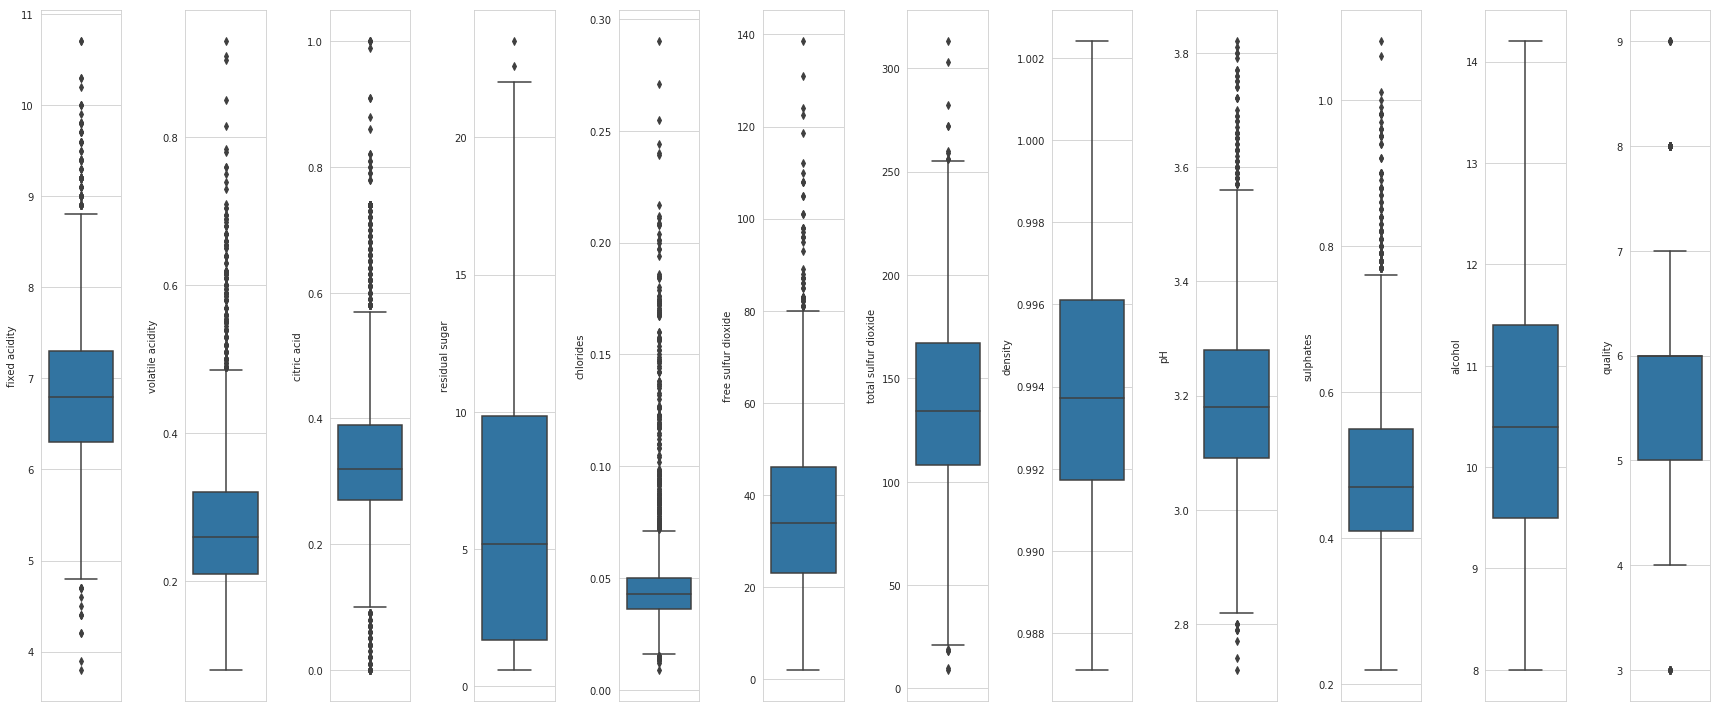

In [95]:
number_of_columns = len(df.columns)
fig, ax = plt.subplots(1, number_of_columns, figsize=(number_of_columns*2, 10))
for i, column in enumerate(df.columns):
    sns.set_style('whitegrid')
    sns.boxplot(df_sin_outliers[column], orient='v', ax=ax[i])
plt.tight_layout()

Corremos esto hasta que quedemos satisfechos con los outliers que eliminamos

In [101]:
df_sin_outliers.shape

(4889, 12)

Vemos cuántas filas nos quedan después del proceso y corremos los gráficos de nuevo.

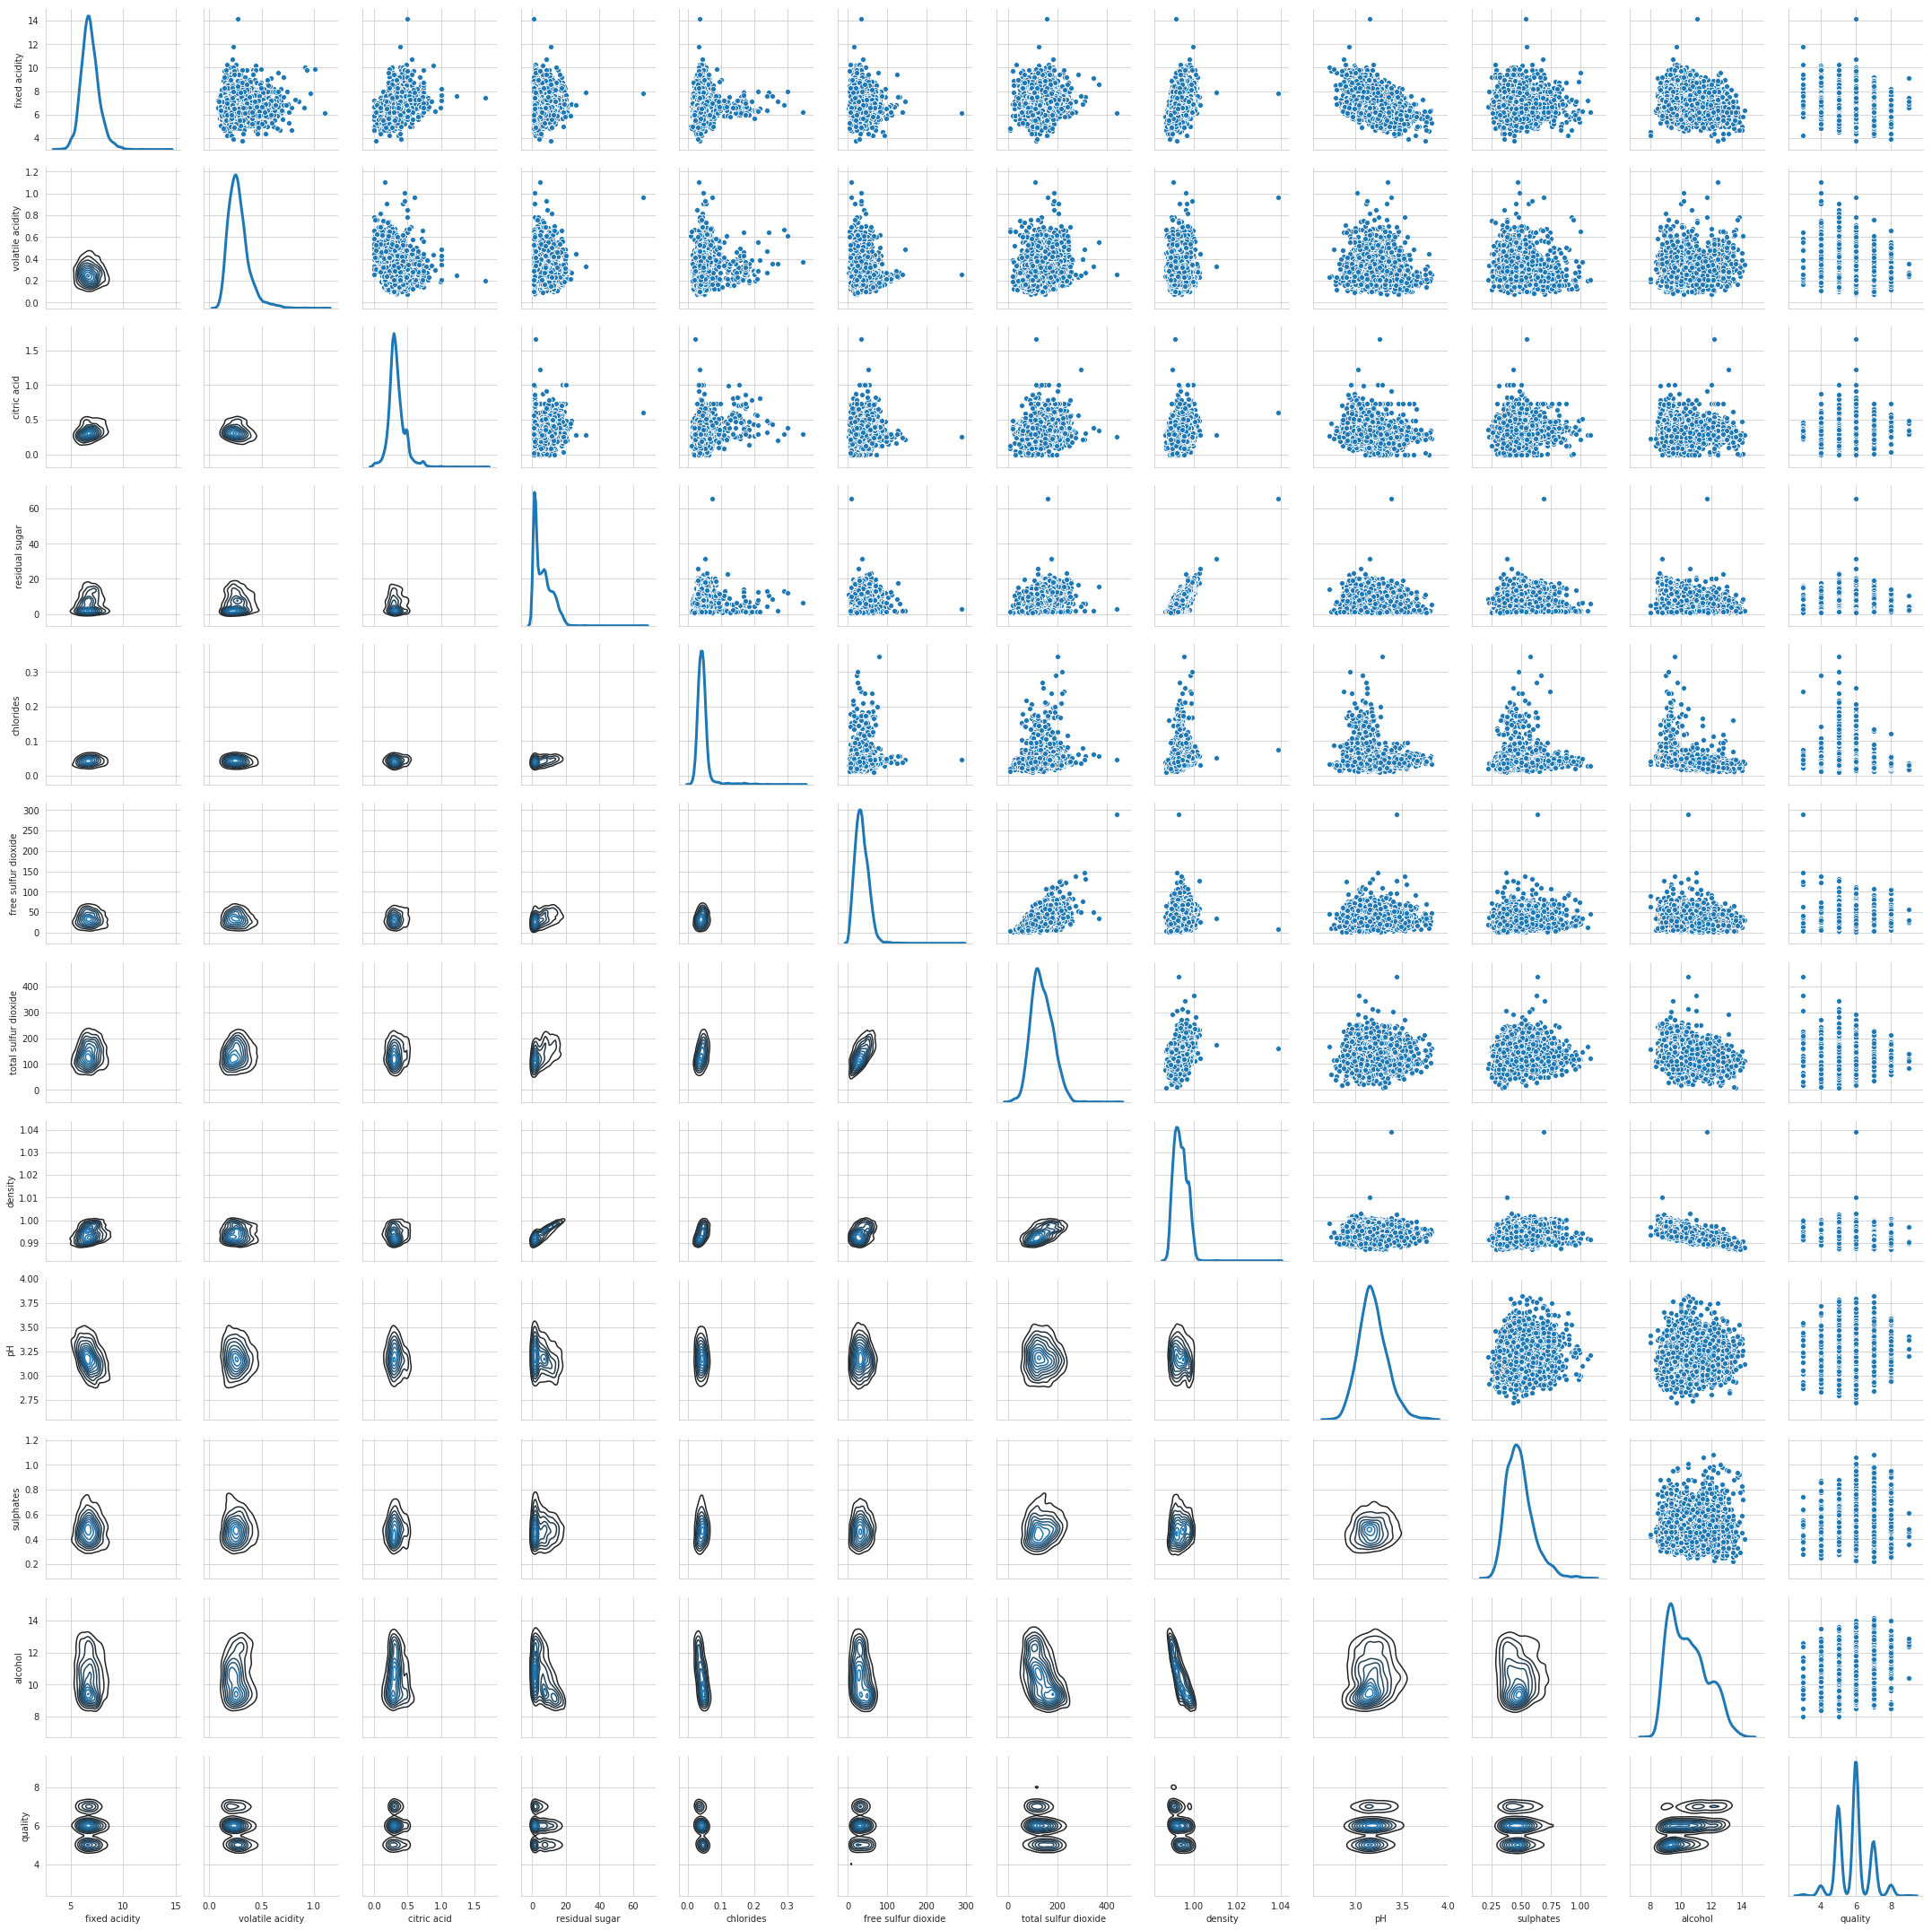

In [98]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot, lw=3)

# 6. Descubrir patrones en los datos

Vamos a ver más en detalle la relación de `residual sugar`, `alcohol` y `density`. 

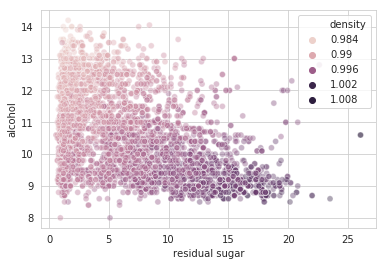

In [127]:
sns.scatterplot(x="residual sugar", y="alcohol", data=df_sin_outliers, alpha=0.4, hue='density')

¿Por qué es importante eliminar a los outliers? Si no lo hacemos el gráfico anterior se vería como este:

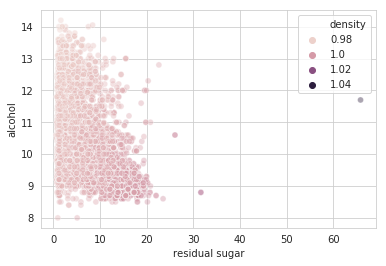

In [129]:
sns.scatterplot(x="residual sugar", y="alcohol", data=df, alpha=0.4, hue='density')